In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

In [2]:
# get image names with full path as list
from undistortImg import camera_calibration, undistort_img

img_path_list = glob.glob('/home/workspace/CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')
mtx, dist = camera_calibration(img_path_list)

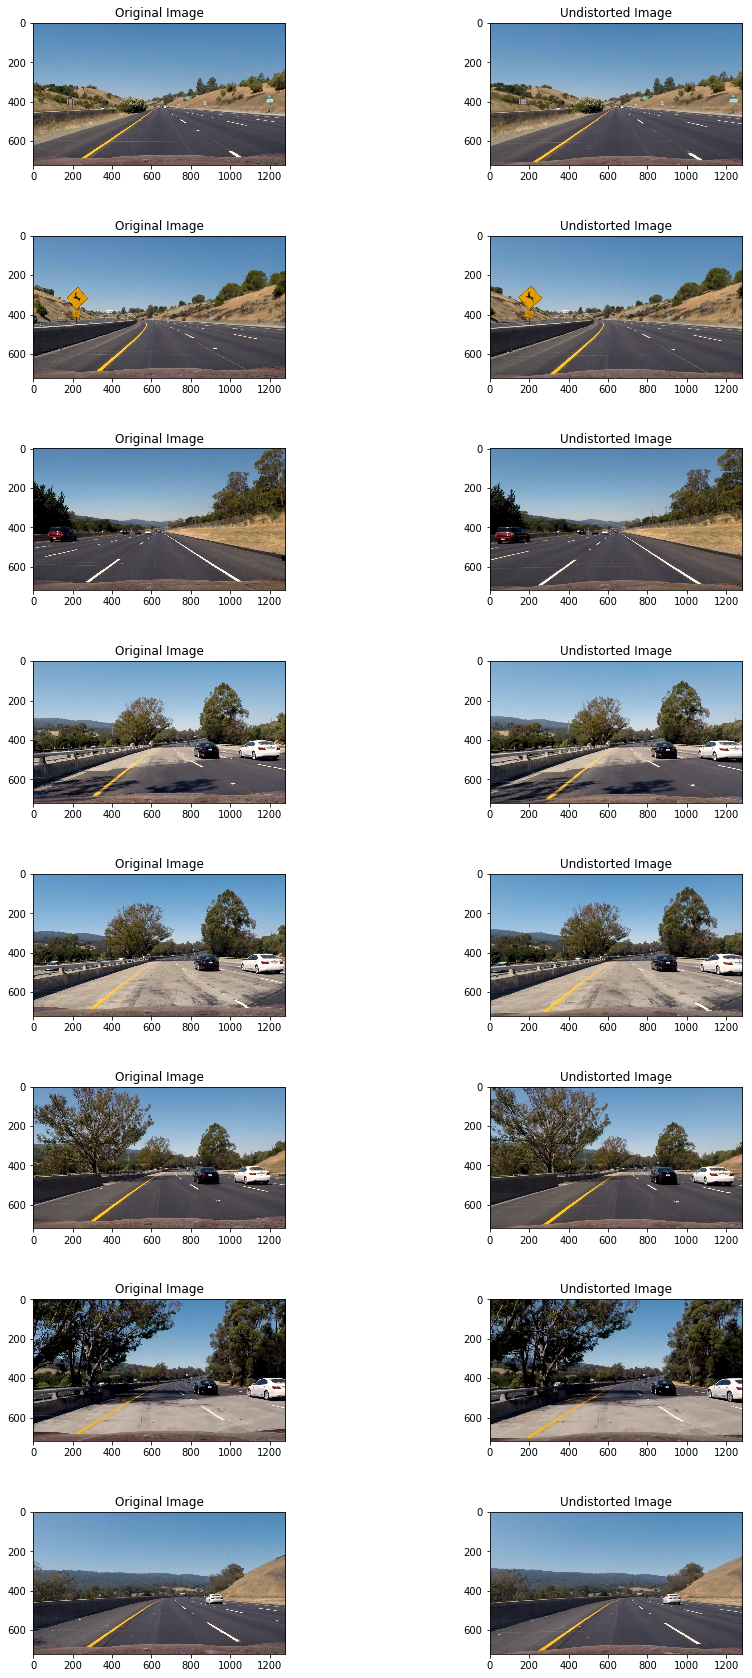

In [3]:
f, axes = plt.subplots(8,2,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

images = glob.glob('test_images/*.jpg') # Reading Images from test_images folder
original_images = []
undistorted_images = []
for index, image in enumerate(images):
    original_img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    original_images.append(original_img)
    axes[index,0].imshow(original_img)
    axes[index,0].set_title("Original Image")
    undistorted_img = undistort_img(original_img, mtx, dist) # undistorting image 
    undistorted_images.append(undistorted_img)
    axes[index,1].set_title("Undistorted Image")
    axes[index,1].imshow(undistorted_img)

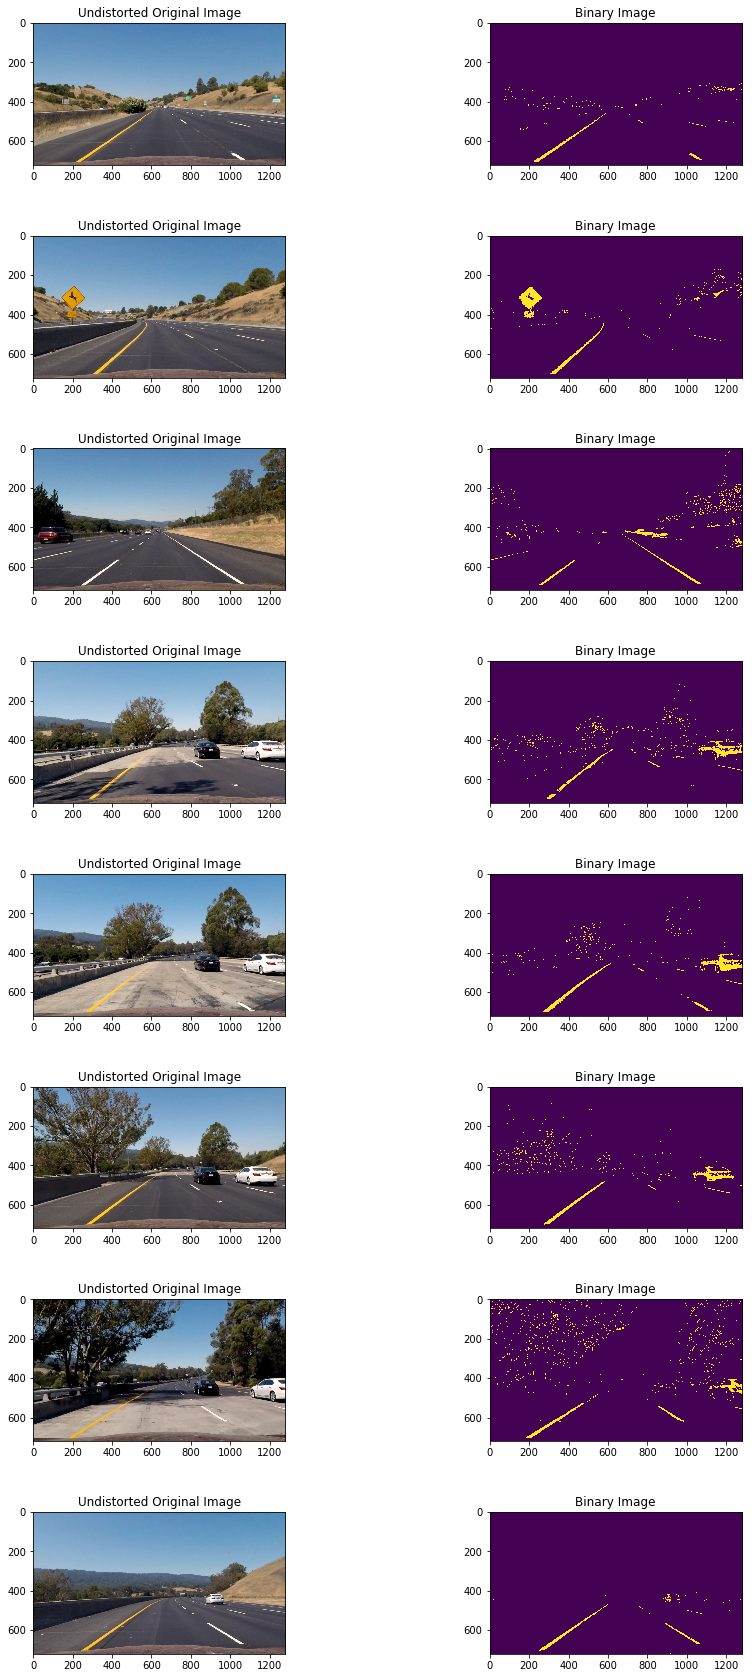

In [4]:
from colorChannel import create_threshold_binary

f, axes = plt.subplots(8,2,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

binary_images = []
for index, image in enumerate(undistorted_images):
    axes[index,0].imshow(image)
    axes[index,0].set_title("Undistorted Original Image")
    binary_img = create_threshold_binary(image) # apply color threshold 
    binary_images.append(binary_img)
    axes[index,1].set_title("Binary Image")
    axes[index,1].imshow(binary_img)

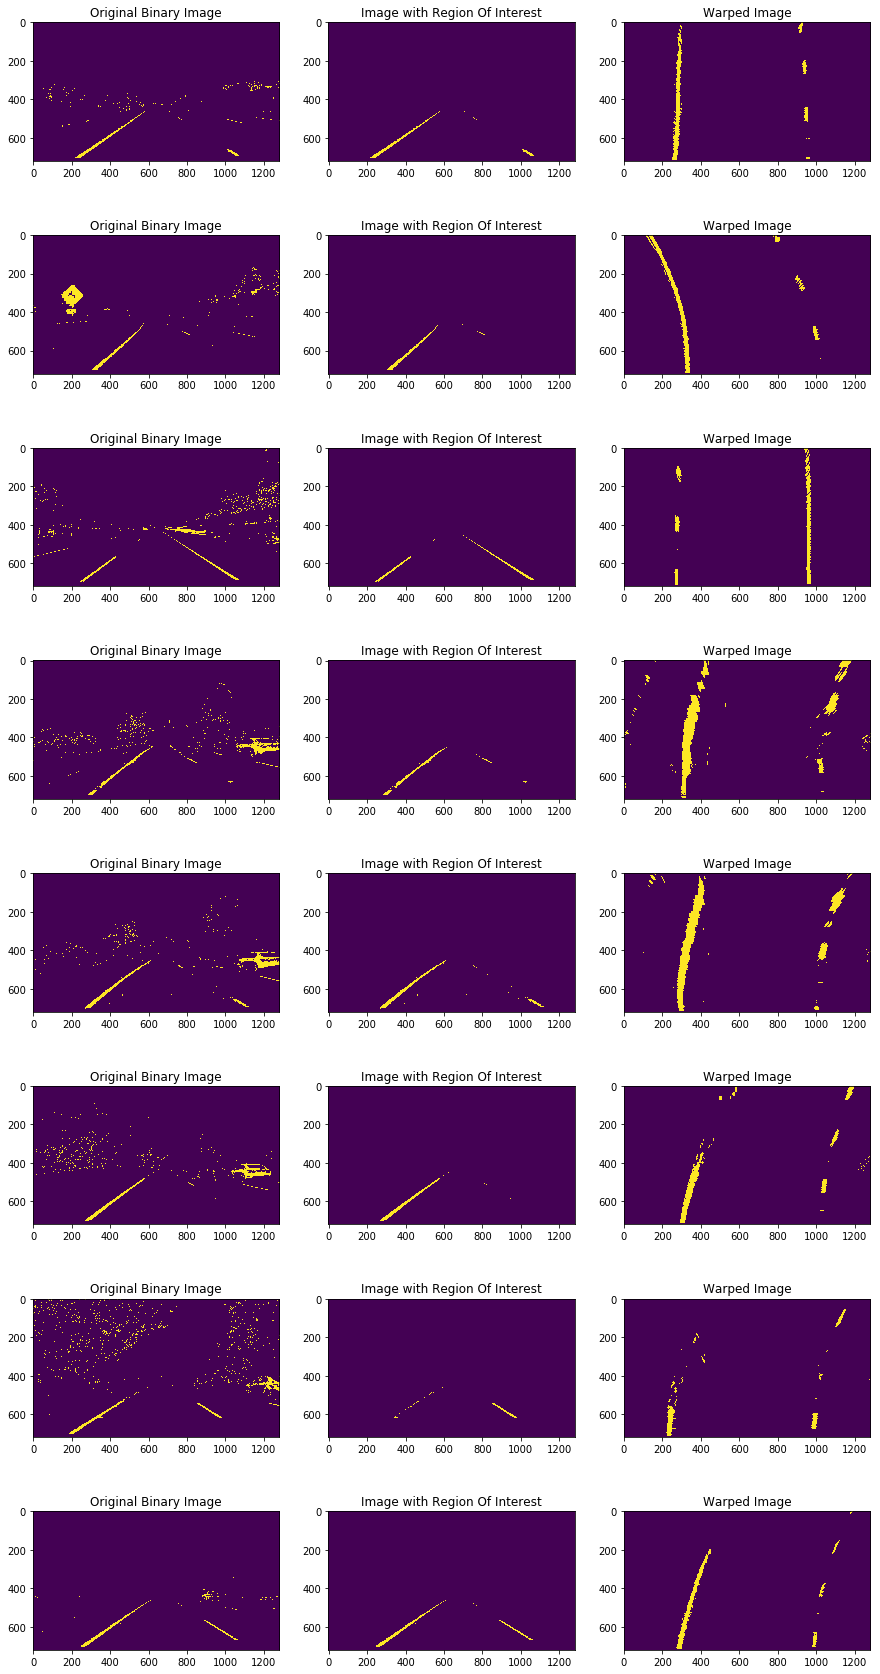

In [5]:
# testing ROI and wrap on test images
from warpingImage import warp_perspective, ROI

f, axes = plt.subplots(8,3,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

warped_images = []
M = None
for index, image in enumerate(binary_images):
    roi_image = image.copy()
    axes[index,0].imshow(image)
    axes[index,0].set_title("Original Binary Image")
    roi_image = ROI(roi_image)
    axes[index,1].imshow(roi_image)
    axes[index,1].set_title("Image with Region Of Interest")
    y=image.shape[0]
    x=image.shape[1]
    warped, M, M_inv = warp_perspective(image)
    warped_images.append(warped)
    axes[index,2].imshow(warped)
    axes[index,2].set_title("Warped Image")

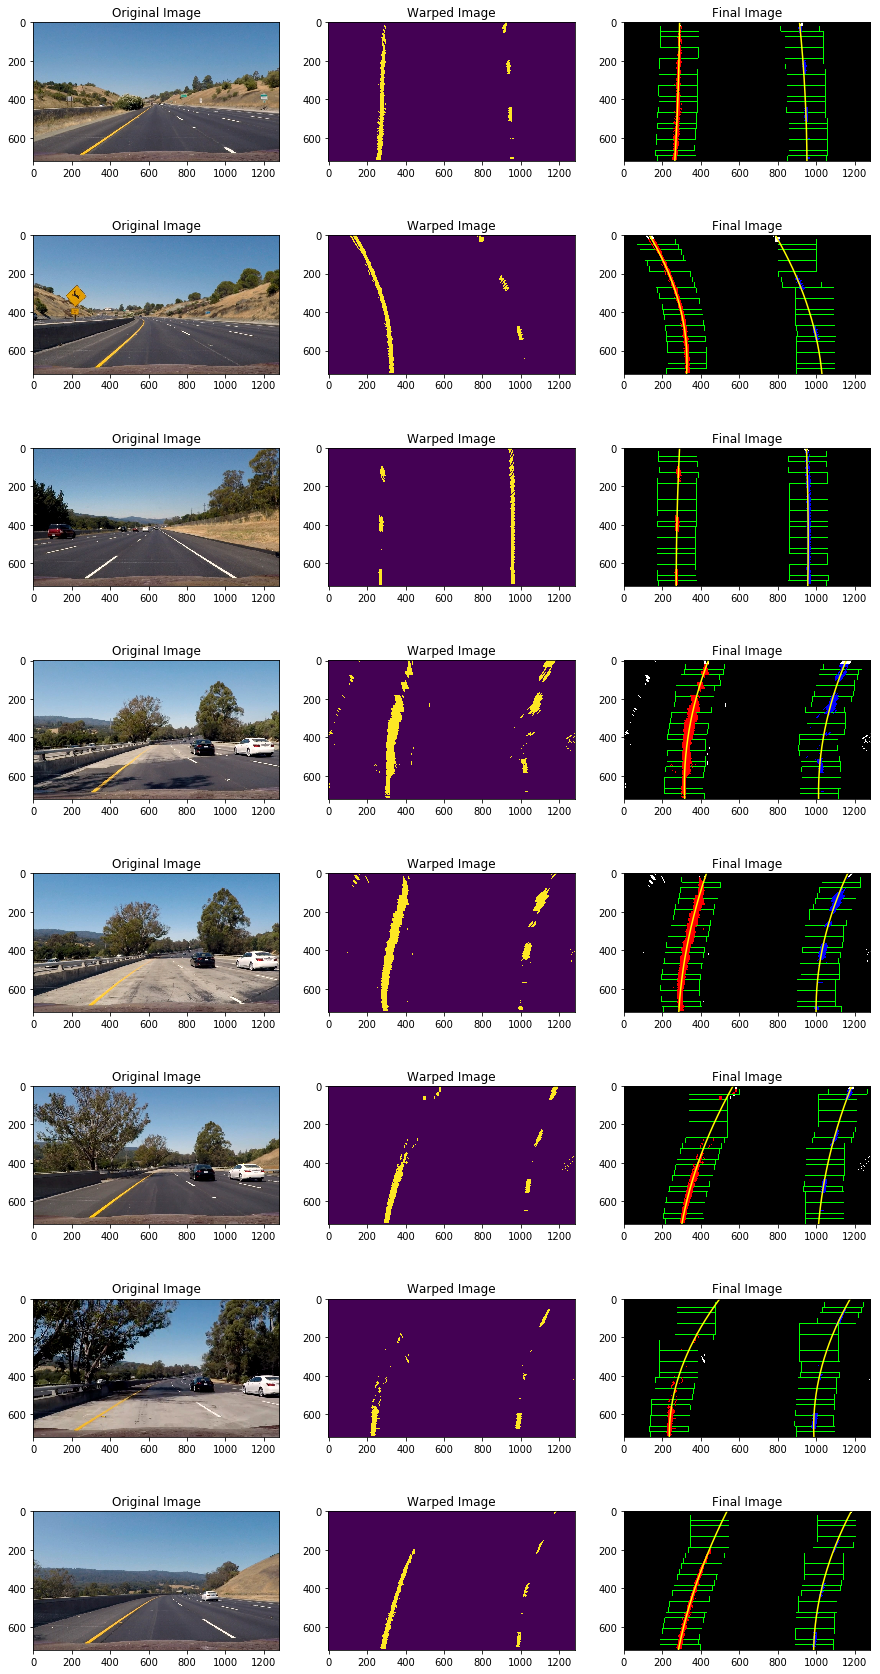

In [6]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

from lanePixelDetector import find_first_lanes

f, axes = plt.subplots(8,3,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

for index, image in enumerate(warped_images):
    axes[index,0].imshow(original_images[index])
    axes[index,0].set_title("Original Image")
    
    axes[index,1].imshow(image)
    axes[index,1].set_title("Warped Image")

    left_fit, right_fit, left_fit_m, right_fit_m, left_lane_inds, right_lane_inds, \
        out_img, nonzerox, nonzeroy = find_first_lanes(image, ym_per_pix, xm_per_pix)
    # Visualization
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    axes[index,2].imshow(out_img)
    axes[index,2].plot(left_fitx, ploty, color='yellow')
    axes[index,2].plot(right_fitx, ploty, color='yellow')
    axes[index,2].set_title("Final Image")

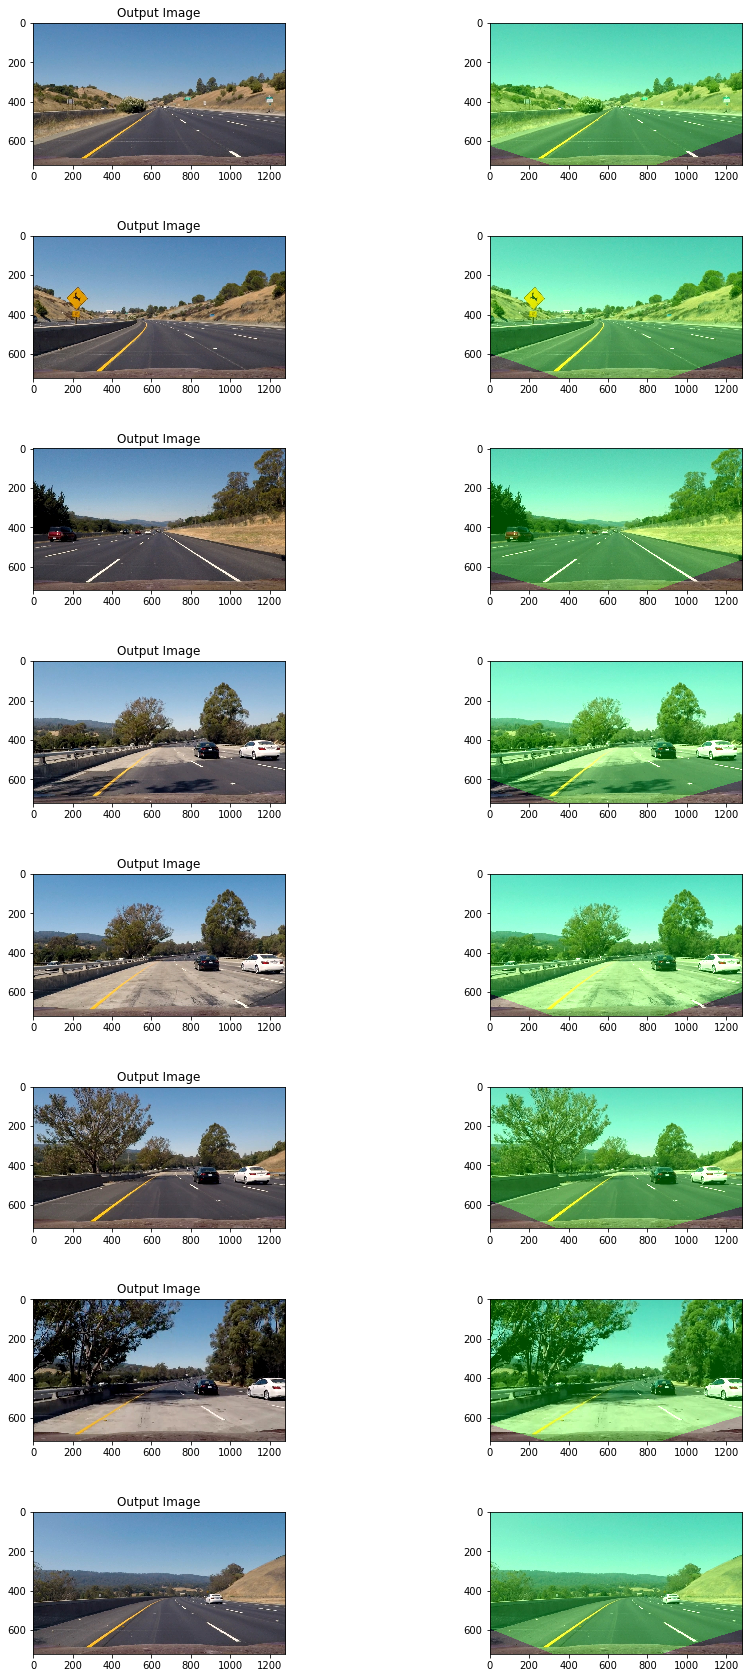

In [9]:
from laneDrawer import draw_line

f, axes = plt.subplots(8,2,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

for index, image in enumerate(original_images):
    axes[index,0].imshow(image)
    axes[index,0].set_title("Original Image")

    left_fit, right_fit, left_fit_m, right_fit_m, left_lane_inds, right_lane_inds, \
        out_img, nonzerox, nonzeroy = find_first_lanes(warped_images[index], ym_per_pix, xm_per_pix)
    # Visualization
    output = draw_line(image, left_fit, right_fit, M_inv)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    axes[index,1].imshow(output)
    axes[index,0].set_title("Output Image")